In [32]:
import sys
import os
import pandas as pd

# Add the parent directory of `src` to the path
sys.path.append(os.path.abspath('../')) 

In [33]:
from src.load_data import load_engagement_data
from src.config import DATA_PATH
print(DATA_PATH)
print("Looking for file at:", DATA_PATH)
print("File exists?", os.path.exists(DATA_PATH))
df = load_engagement_data(DATA_PATH)
df.head()
df.info()
df['timestamp'].describe()

e:\Probietech\ProjectsData\Shashank\insta_test\data\engagements.csv
Looking for file at: e:\Probietech\ProjectsData\Shashank\insta_test\data\engagements.csv
File exists? True
<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17840
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   timestamp      17812 non-null  datetime64[ns, UTC]
 1   media_id       17812 non-null  int64              
 2   media_caption  17804 non-null  object             
 3   comment_text   17812 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 695.8+ KB


count                                  17812
mean     2025-03-21 05:23:41.351976192+00:00
min         2025-03-01 00:04:05.094000+00:00
25%      2025-03-16 06:29:49.944499968+00:00
50%      2025-03-21 20:17:24.616999936+00:00
75%      2025-03-25 04:35:45.611249920+00:00
max         2025-04-02 18:32:53.066000+00:00
Name: timestamp, dtype: object

In [34]:
# import nltk
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [35]:
# Check distribution of sentiment labels
from src.preprocessing import apply_cleaning
df = apply_cleaning(df)
df.head()
# df[['comment_text', 'clean_text']].head(10)

,timestamp,media_id,media_caption,comment_text,clean_text
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,bet good
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good,know smells good
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,love
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...,please carry canada miss much
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️,love


In [36]:
from src.sentiment_analysis import get_sentiment_dataframe

df = get_sentiment_dataframe(df)
print(df.head())

                         timestamp           media_id  \
0 2025-03-01 00:13:57.153000+00:00   1090986906404998   
1 2025-03-01 00:23:06.879000+00:00  17950254656929862   
2 2025-03-01 00:04:05.094000+00:00   1090109319826090   
3 2025-03-01 00:41:59.467000+00:00   1098364052333950   
4 2025-03-01 02:21:29.715000+00:00   1083943630442659   

                                       media_caption  \
0  Soft skin, soft life 🩷🌸🫧 get your hands on thi...   
1  Why use one scrub when you can use them all at...   
2  Morning routine with Tree Hut 🍊🫧 Now available...   
3  Why use one scrub when you can use them all at...   
4  Vanilla Serum-Infused Hand Wash: A sweet escap...   

                                        comment_text  \
0                                 I bet this is good   
1                         i know this smells so good   
2                                            Love it   
3  Please carry these in Canada! I miss them so m...   
4                                     I 

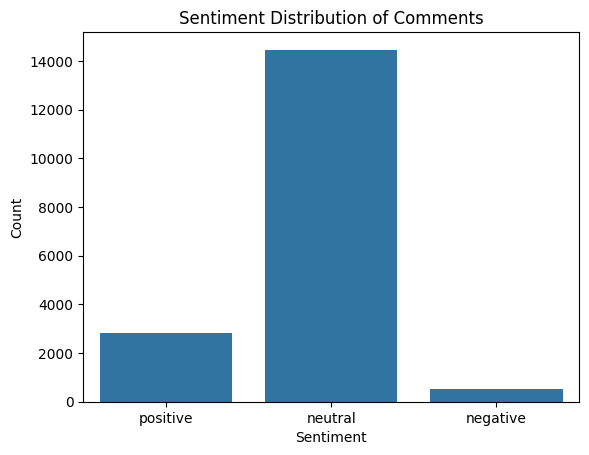

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="sentiment", order=["positive", "neutral", "negative"])
plt.title("Sentiment Distribution of Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [38]:
print(df[['comment_text', 'sentiment']].sample(10))

                                            comment_text sentiment
125    Oh look it's me in the shower (actually with t...   neutral
6170                                        '@anaa.jelea   neutral
8208                                       Keaira Clancy   neutral
9574                         I love ur body scrubs!!🪞🪞💕💕  positive
8490                                     Rachele Risucci   neutral
12328                                         TreeHut PR   neutral
13009                                         TreeHut PR   neutral
6799           Sooo cute I’ll have to do this for mine !  positive
2855                                                   2   neutral
2986   Pleaseeeeeee come out with sunkissed poppy spr...   neutral


In [39]:
from src.trend_analysis import compute_daily_sentiment_trend
daily_percent = compute_daily_sentiment_trend(df)
daily_percent.head()

sentiment,positive,neutral,negative
date,,,
2025-03-01,33.950617,59.876543,6.172840
2025-03-02,33.333333,53.703704,12.962963
2025-03-03,33.587786,61.068702,5.343511
2025-03-04,35.937500,53.645833,10.416667
2025-03-05,43.478261,52.536232,3.985507


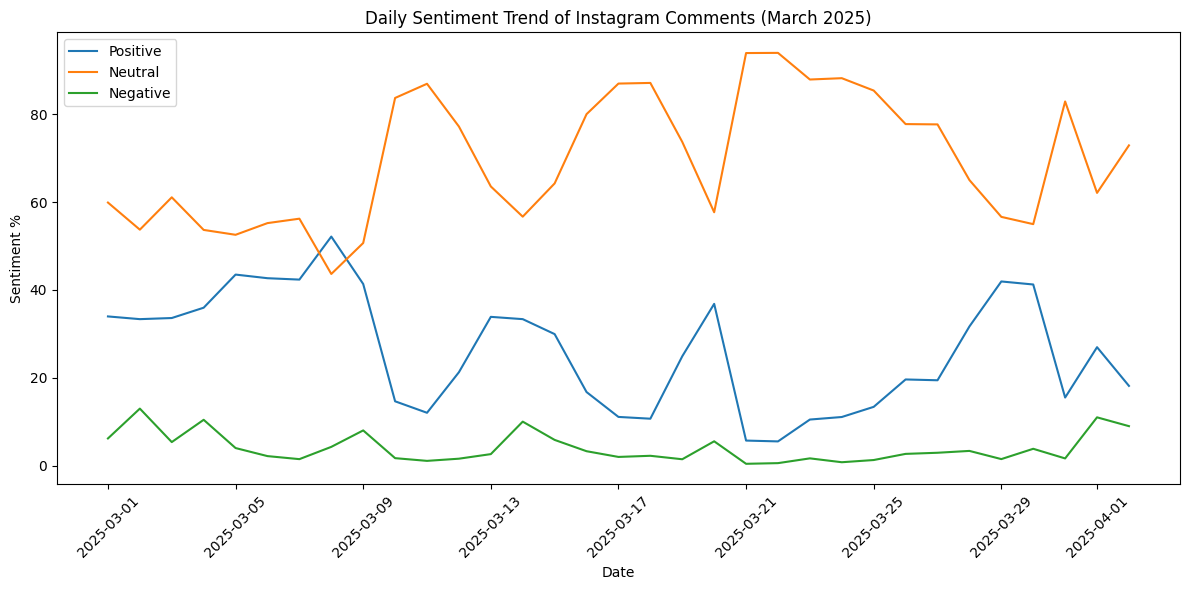

In [40]:
plt.figure(figsize=(12, 6))
for sentiment in ['positive', 'neutral', 'negative']:
    plt.plot(daily_percent.index, daily_percent[sentiment], label=sentiment.capitalize())

plt.title("Daily Sentiment Trend of Instagram Comments (March 2025)")
plt.xlabel("Date")
plt.ylabel("Sentiment %")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# Show spike days
high_neg = daily_percent[daily_percent['negative'] > 10]
high_pos = daily_percent[daily_percent['positive'] > 40]

print("High negativity days:\n", high_neg)
print("High positivity days:\n", high_pos)

High negativity days:
 sentiment    positive    neutral   negative
date                                       
2025-03-02  33.333333  53.703704  12.962963
2025-03-04  35.937500  53.645833  10.416667
2025-04-01  26.946108  62.075848  10.978044
High positivity days:
 sentiment    positive    neutral  negative
date                                      
2025-03-05  43.478261  52.536232  3.985507
2025-03-06  42.652330  55.197133  2.150538
2025-03-07  42.335766  56.204380  1.459854
2025-03-08  52.127660  43.617021  4.255319
2025-03-09  41.333333  50.666667  8.000000
2025-03-29  41.911765  56.617647  1.470588
2025-03-30  41.221374  54.961832  3.816794


In [42]:
from src.keyword_extraction import extract_top_ngrams
# 📌 Separate Clean Text by Sentiment
pos_comments = df[df['sentiment'] == 'positive']['clean_text'].tolist()
neg_comments = df[df['sentiment'] == 'negative']['clean_text'].tolist()

# 📌 Extract Top Phrases
top_pos_phrases = extract_top_ngrams(pos_comments, ngram_range=(1,2), top_k=20)
top_neg_phrases = extract_top_ngrams(neg_comments, ngram_range=(1,2), top_k=20)

# 📌 Print Results
print("🔹 Top Positive Phrases")
for phrase, count in top_pos_phrases:
    print(f"{phrase}: {count}")

print("\n🔻 Top Negative Phrases")
for phrase, count in top_neg_phrases:
    print(f"{phrase}: {count}")

🔹 Top Positive Phrases
love: 876
treehut: 268
good: 228
like: 199
smells: 163
scent: 159
tree: 154
amazing: 150
hut: 142
tree hut: 141
want: 132
favorite: 130
body: 129
yes: 128
scrub: 112
smell: 108
need: 104
products: 90
try: 86
best: 83

🔻 Top Negative Phrases
april: 103
fools: 103
april fools: 101
joke: 45
treehut: 36
good: 34
need: 33
chaotic: 32
dont: 32
obsessed: 32
bad: 31
fools joke: 29
want: 27
body: 25
chaotic good: 24
like: 21
tree: 21
ill: 20
got: 19
stop: 19


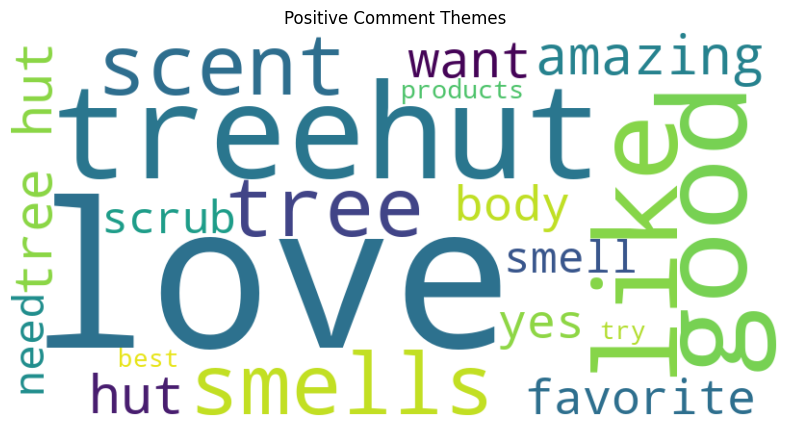

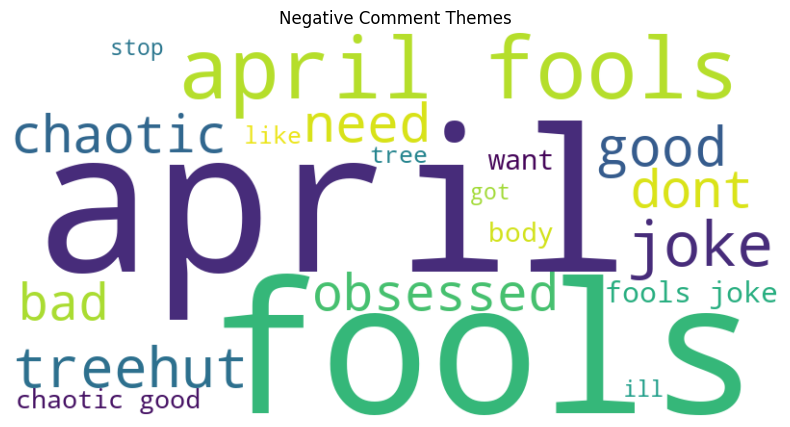

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(phrases, title="Word Cloud"):
    word_freq = dict(phrases)
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate
show_wordcloud(top_pos_phrases, title="Positive Comment Themes")
show_wordcloud(top_neg_phrases, title="Negative Comment Themes")

In [44]:
from src.intent import cluster_comments

# 📌 Optionally filter only positive comments
df_pos = df[df['sentiment'] == "positive"].copy()

# 📌 Run clustering
labels, top_terms = cluster_comments(df_pos["clean_text"].tolist(), num_clusters=5)

# 📌 Add back to DataFrame
df_pos["intent_cluster"] = labels

# 📌 Show summary
for i, terms in enumerate(top_terms):
    print(f"\n🔹 Cluster {i}: {terms}")
    print(df_pos[df_pos["intent_cluster"] == i]["comment_text"].sample(3, random_state=42).tolist())


🔹 Cluster 0: love, scent, treehut, stuff, products
['Love this stuff', 'Love it', 'Yesssss🙌☀️✨🌺I love this scent']

🔹 Cluster 1: love, treehut, good, yes, want
['The ugly truth about life is, so many partners are in love but not together and so many are together but not in love, they is a way on how to avoid getting too deep into fruitless relationships My partner that I have always wish to have back came to me begging for forgiveness after 1 years of separation and I have been trying my best to get him back don’t allow pride ride you. if you are still in love with your partner and want him/her back or you feel you are in toxic relationship and needed help I recommend👇👇👇👇 https://www.facebook.com/share/1HnyggyQ75/?mibextid=LQQJ4d', 'Need the rest of this collection in Canada, best sent ever🥰', 'YES 😭😭 Treehut PR 🖤']

🔹 Cluster 2: favorite, scent, absolute, rose, scents
['This one is my favorite one!', 'My favorite', 'The watermelon is my favorite!']

🔹 Cluster 3: excited, ive, ahh, ap

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
# Cluster comments and get vector representation
comments = df_pos["clean_text"].tolist()

# Same vectorizer as in src/intent.py
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words="english")
X = vectorizer.fit_transform(comments)

df_pos["intent_cluster"] = labels

# Convert sparse TF-IDF to dense for t-SNE
X_dense = X.toarray()

# Run t-SNE
tsne = tsne = TSNE(n_components=2, random_state=42, perplexity=40, max_iter=1000)
X_tsne = tsne.fit_transform(X_dense)

# Add to DataFrame
df_pos["tsne_1"] = X_tsne[:, 0]
df_pos["tsne_2"] = X_tsne[:, 1]

C:\Users\patel\AppData\Local\Temp\ipykernel_31804\352075954.py:15: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\Probietech\ProjectsData\Shashank\insta_test\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


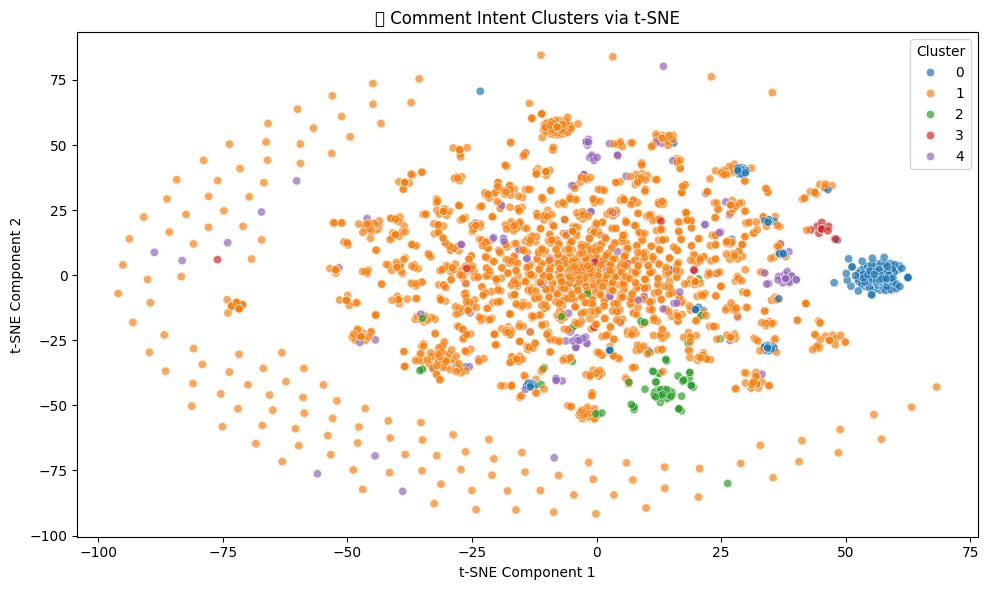

In [46]:
#Step 5: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="intent_cluster",
    palette="tab10",
    data=df_pos,
    alpha=0.7
)

plt.title("💬 Comment Intent Clusters via t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [47]:

# from src.intent import get_top_words_per_cluster
df_clustered = df_pos.copy()  # or df_sentiment if you're working from original
df_clustered["cluster"] = labels
df_clustered["x"] = X_tsne[:, 0]
df_clustered["y"] = X_tsne[:, 1]


# get_top_words_per_cluster(df_clustered, cluster_col='cluster', text_col='clean_comment')


In [48]:
from src.intent import get_top_keywords_per_cluster, assign_intent_names

# Get readable names
cluster_names = get_top_keywords_per_cluster(df_clustered)
df_clustered = assign_intent_names(df_clustered, cluster_names)

# Preview
df_clustered[["cluster", "cluster_name"]].drop_duplicates()


,cluster,cluster_name
0,1,"love, good, treehut, yes, want"
2,0,"scent, treehut, stuff, products, try"
76,2,"scent, absolute, rose, scents, moroccan"
80,4,"omg, cute, great, love, yes"
753,3,"treehut, danigetssocial, vanilla, ahh, ive"


C:\Users\patel\AppData\Local\Temp\ipykernel_31804\1142631363.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.values, y=cluster_counts.index, palette="viridis")


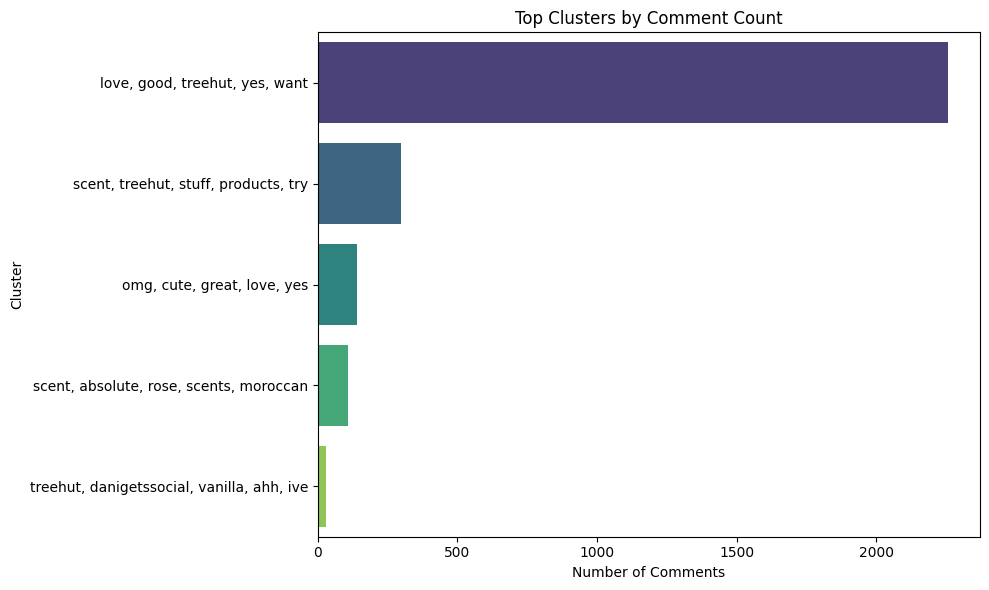

In [49]:
# Count the number of comments per cluster name
cluster_counts = df_clustered["cluster_name"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.values, y=cluster_counts.index, palette="viridis")

plt.title("Top Clusters by Comment Count")
plt.xlabel("Number of Comments")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


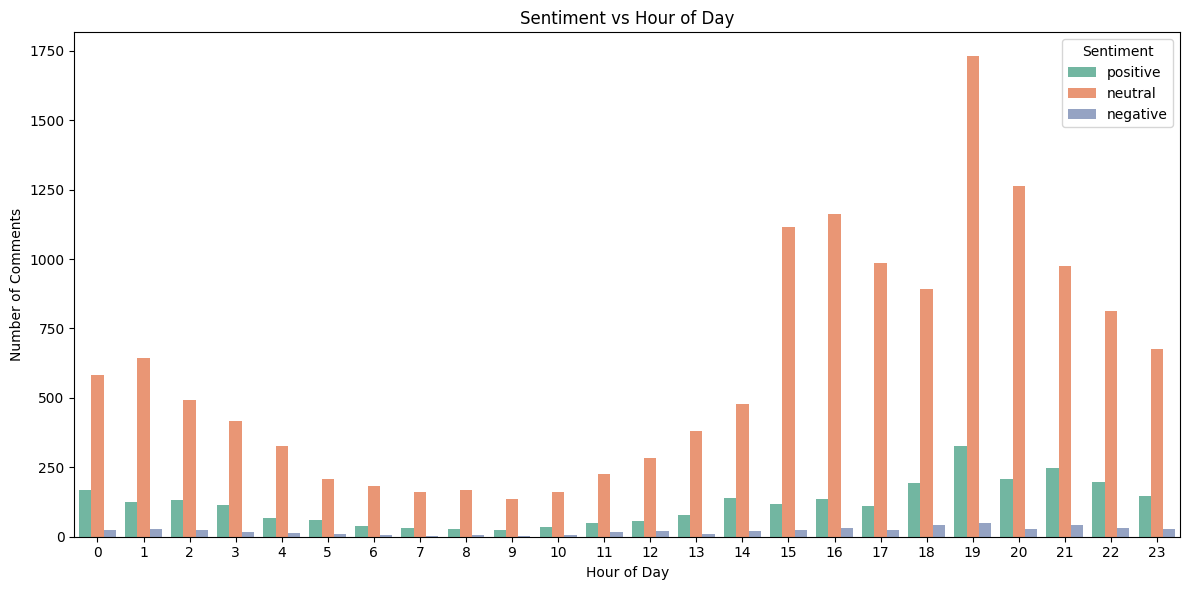

In [50]:
#Sentiment vs Hour Chart
df['created_time'] = pd.to_datetime(df['timestamp'])  # adjust if column name differs
df['hour'] = df['created_time'].dt.hour
df['day'] = df['created_time'].dt.day_name()

# Plot sentiment frequency by hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='sentiment', palette='Set2')
plt.title('Sentiment vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


C:\Users\patel\AppData\Local\Temp\ipykernel_31804\4032863705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['is_purchase_intent']], x='hour', palette='magma')


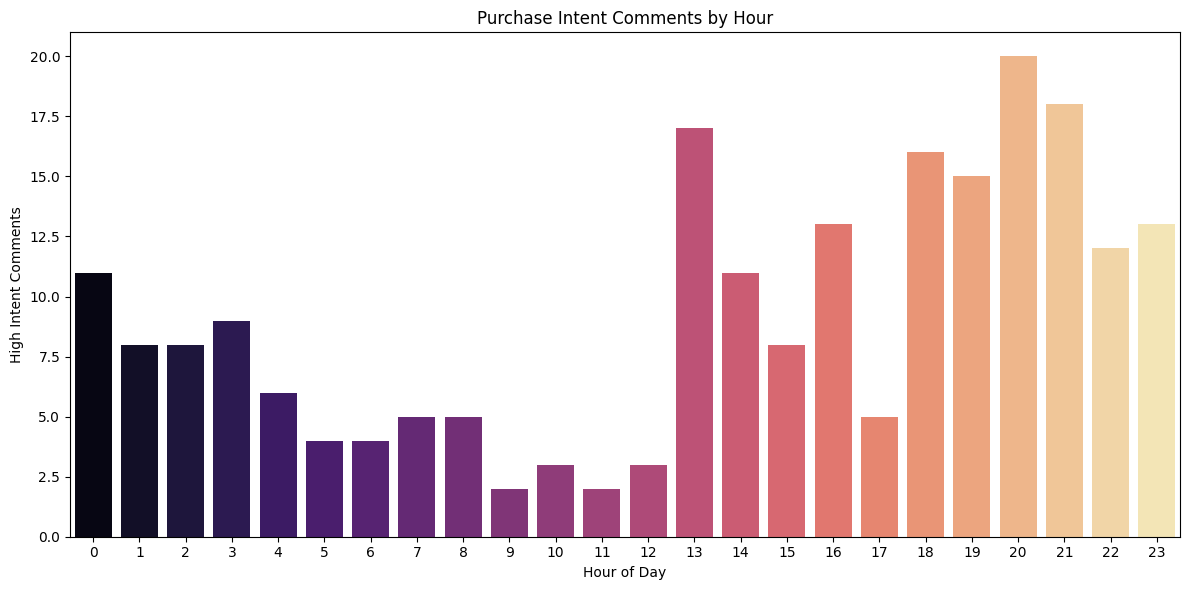

In [51]:
#Step 4: Purchase Intent Keyword vs Hour

purchase_keywords = ['buy', 'ordered', 'order', 'purchase', 'bought', 'add to cart', 'can’t wait', 'trying this']

def is_purchase_intent(text):
    return any(word in text.lower() for word in purchase_keywords)

df['is_purchase_intent'] = df['clean_text'].apply(is_purchase_intent)

# Plot purchase intent by hour
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['is_purchase_intent']], x='hour', palette='magma')
plt.title('Purchase Intent Comments by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('High Intent Comments')
plt.tight_layout()
plt.show()

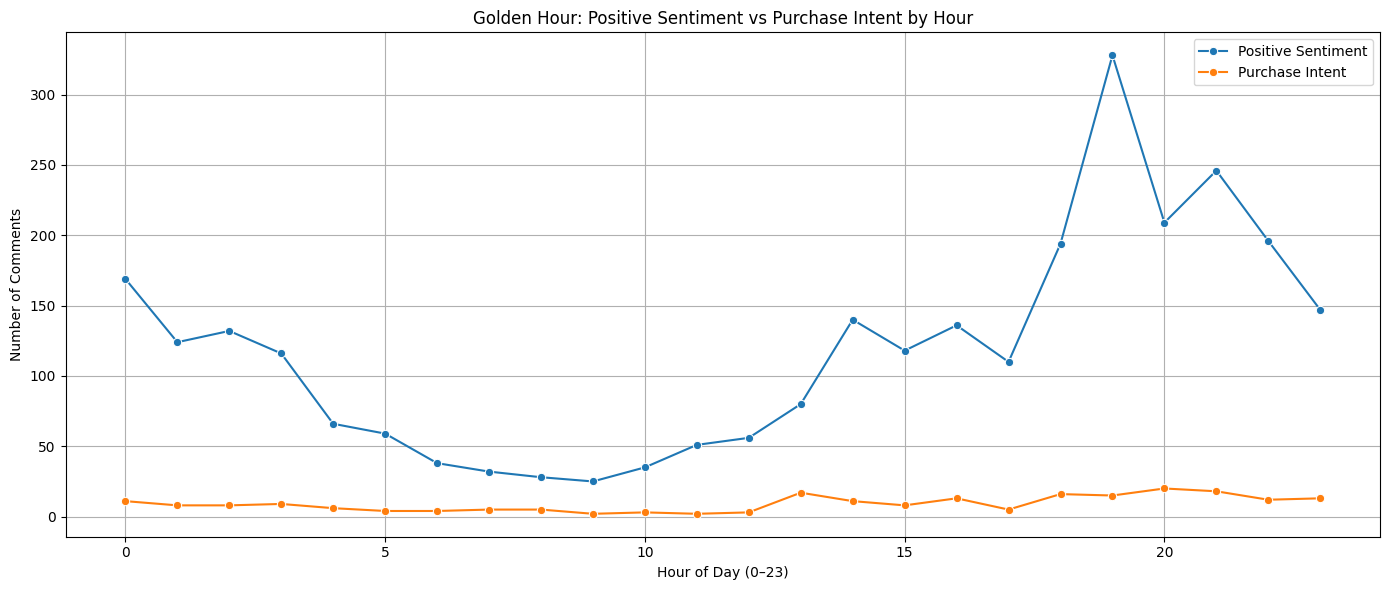

In [52]:
# Step 5: Identify the Golden Hour(s)

df['hour'] = df['timestamp'].dt.hour
df['is_purchase_intent'] = df['clean_text'].apply(is_purchase_intent)

# Top hours by positive sentiment
golden_sentiment = df[df['sentiment'] == 'positive']['hour'].value_counts().sort_index()

# Top hours by purchase intent
golden_purchase = df[df['is_purchase_intent']]['hour'].value_counts().sort_index()


plt.figure(figsize=(14, 6))
sns.lineplot(x=golden_sentiment.index, y=golden_sentiment.values, label='Positive Sentiment', marker='o')
sns.lineplot(x=golden_purchase.index, y=golden_purchase.values, label='Purchase Intent', marker='o')
plt.title('Golden Hour: Positive Sentiment vs Purchase Intent by Hour')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
summary = pd.DataFrame({
    'hour': range(24),
    'positive_sentiment': golden_sentiment.reindex(range(24), fill_value=0).values,
    'purchase_intent': golden_purchase.reindex(range(24), fill_value=0).values
})
summary.to_csv('output/golden_hour_summary.csv', index=False)